**Section I: Import the Data**

For this lab we'll be grouping adults based on certain factors.

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

In [2]:
from sklearn import preprocessing

In [3]:
df = pd.read_csv('/Users/elutins/Desktop/GA/Curriculum/Week-7/7.02-intro-to-clustering-lab/adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

**Section II: EDA**

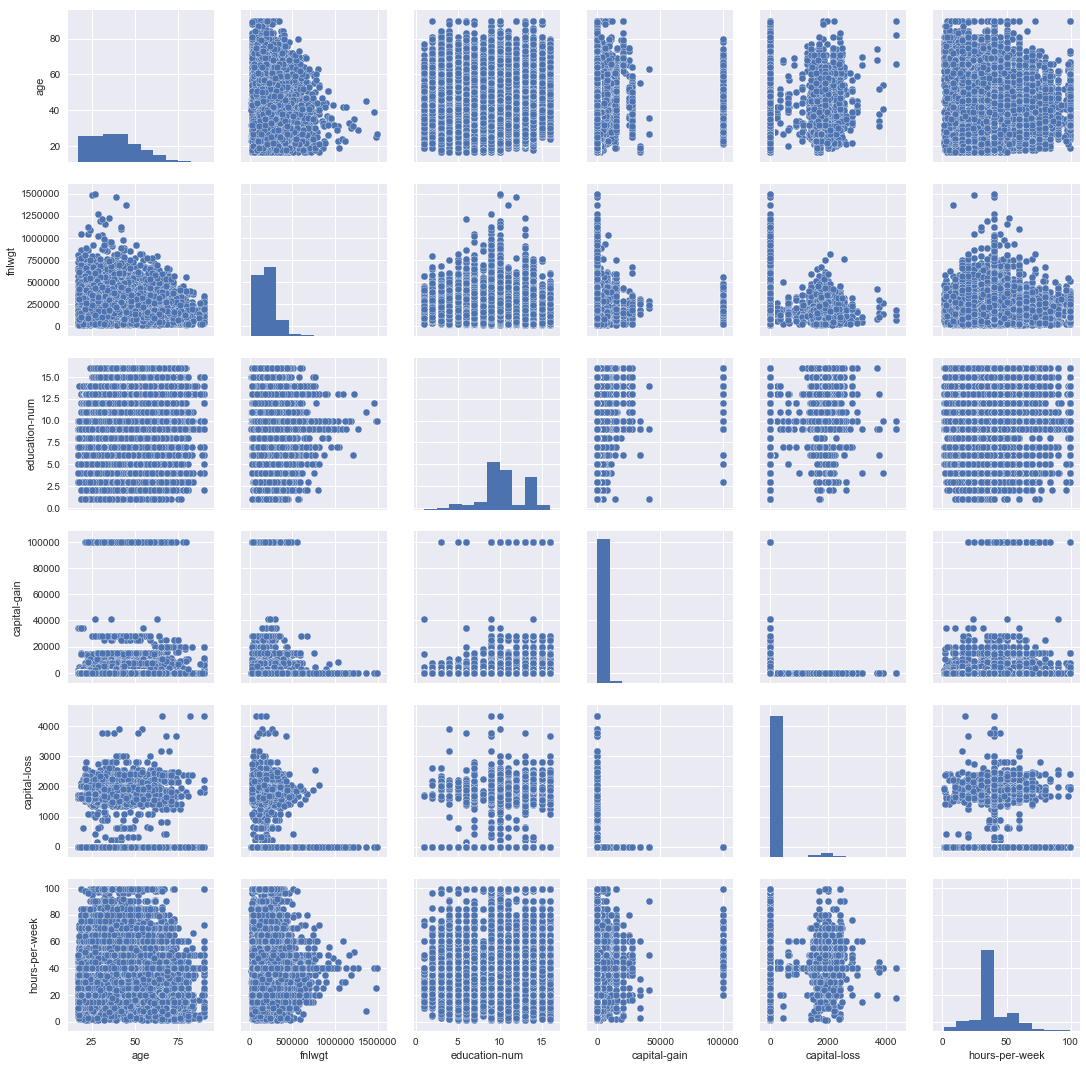

In [6]:
# Plot the Data to see the distributions/relationships
X = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
# cols = df.columns[:-1]
sns.pairplot(X)

In [7]:
# Check for nulls
df.duplicated().sum()

30

In [8]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income            16281
dtype: int64

In [9]:
df.nunique()

age                  74
workclass             8
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                2
dtype: int64

In [10]:
# Check datatypes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

**Section III: Prep for Clustering**

In [11]:
# Create dummy variables - be careful not to do so many.
df_sex = pd.get_dummies(df['sex'])
df_income = pd.get_dummies(df['income'])
df_race = pd.get_dummies(df['race'])

In [12]:
df_dummy = pd.concat([df_sex, df_income], axis=1)
# # Scale the data
# # X_scaled = preprocessing.normalize(X,axis=0)
X1_scaled = preprocessing.normalize(X,axis=0)

In [13]:
pd.DataFrame(X1_scaled, columns=X.columns).describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.004264,0.003953,0.004384,0.000648,0.000960,0.004326
std,0.001513,0.002201,0.001118,0.004478,0.004422,0.001326
min,0.001876,0.000256,0.000435,0.000000,0.000000,0.000107
25%,0.003090,0.002450,0.003915,0.000000,0.000000,0.004281
50%,0.004083,0.003713,0.004350,0.000000,0.000000,0.004281
75%,0.005297,0.004953,0.005221,0.000000,0.000000,0.004816
max,0.009932,0.031066,0.006961,0.060093,0.047795,0.010595


**Section IV: Clustering Analysis**

Cluster the Data to our our target groups. Try different version of k to see how your silhouette score changes.

In [14]:
from sklearn.cluster import KMeans

In [15]:
# calculating over 3 clusters
k = 3
kmeans3 = cluster.KMeans(n_clusters=k)
kmeans3.fit(X1_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
# calculating over 5 clusters
k = 2
kmeans2 = cluster.KMeans(n_clusters=k)
kmeans2.fit(X1_scaled)

In [18]:
# calculating over 7 clusters
k = 4
kmeans4 = cluster.KMeans(n_clusters=k)
kmeans4.fit(X1_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Get the labels and centroids

In [19]:
labels = kmeans3.labels_
centroids = kmeans3.cluster_centers_

print 'Labels3:', labels
print ''
print 'Centroids3:', centroids

Labels3: [0 0 0 ..., 0 0 0]

Centroids3: [[  4.24309835e-03   3.95524027e-03   4.35841146e-03   3.66895550e-04
    5.73450538e-06   4.30538229e-03]
 [  5.14358317e-03   3.86755246e-03   5.66628752e-03   6.00929256e-02
    2.27682456e-18   5.40204802e-03]
 [  4.60965166e-03   3.92356322e-03   4.78336162e-03   4.98732999e-18
    2.08249661e-02   4.63866684e-03]]


In [ ]:
labels = kmeans4.labels_
centroids = kmeans4.cluster_centers_

print 'Labels4:', labels
print ''
print 'Centroids4:', centroids

In [ ]:
labels = kmeans2.labels_
centroids = kmeans2.cluster_centers_

print 'Labels2:', labels
print ''
print 'Centroids2:', centroids

Compute the Silhoutte Score to measure your analysis

In [ ]:
print 'Silhouette Score3:', metrics.silhouette_score(X1_scaled, labels, metric='euclidean')

Silhouette Score3:

In [ ]:
import time

In [ ]:
time1 = time
print 'Silhouette Score5:', metrics.silhouette_score(X1_scaled, labels, metric='euclidean')
print time - time1

In [ ]:
print 'Silhouette Score7:', metrics.silhouette_score(X1_scaled, labels, metric='euclidean')